In [24]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

In [25]:
# 10k test data in total
DATA_NUM = 7999

# Parameters
DEC_BITS = 9 # fixed-point number presentation

In [26]:
img = Image.open('images/image_raw.png')
transform = transforms.Grayscale()
img = transform(img)

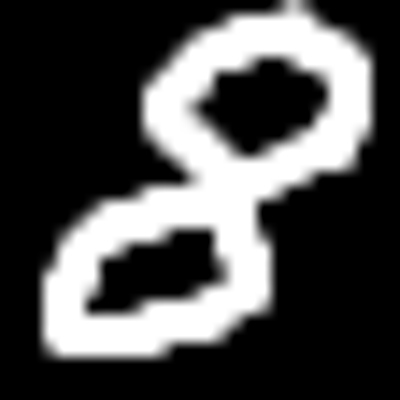

In [27]:
new_size = (400, 400)
resize_img = img.resize(new_size)
display(resize_img)

In [28]:
transform_ts = transforms.ToTensor()
tensor = transform_ts(img)
print(tensor.shape)

torch.Size([1, 28, 28])


In [29]:
listTensor = tensor.numpy()
listTensor = listTensor.squeeze()
print(listTensor.shape)

(28, 28)


In [30]:
lines = list(listTensor.flatten())
# print(lines)

In [31]:
def list_to_unsigned(lines):
  for k, line in enumerate(lines):
    lines[k] = int(np.round(line * (2**DEC_BITS)))
    if lines[k] < 0:
      lines[k] = lines[k] + 2**32
  return lines

In [32]:
lines = list_to_unsigned(lines)
# print(lines)
str1 = "".join((str(line)+",") for line in lines)
str1 = str1[:-1]
str1 = "int mnist_in[784] = {" + str1 + "};"
with open("mnist_in.dat", 'w') as f:
  f.write(str1)
print("success")

success


In [33]:
os.system('scp "mnist_in.dat" user@host:/path/')

1